# Linear Model (Workbook)
### ITCS6156/8156 Spring 2018
### Minwoo "Jake" Lee

In [61]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook
import pandas as pd

## Reading and applying linear models

In [62]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv -o forestfires.csv

'curl' is not recognized as an internal or external command,
operable program or batch file.


In [63]:
# Can I see the map image by using the map? 
df = pd.read_csv("forestfires.csv")

In [64]:
x, y = np.meshgrid(np.arange(7), np.arange(10))
x

array([[0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6]])

In [65]:
y

array([[0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9]])

In [9]:
burned = df.loc[df.loc[:, 'area'] > 0, ['X', 'Y', 'area']]

In [11]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#ax.scatter(df.loc[:, 'X'], df.loc[:, 'Y'], df.loc[:, 'area'], marker='^')
xs, ys = np.meshgrid(range(10), range(10))
xs



array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

<Figure size 432x288 with 0 Axes>

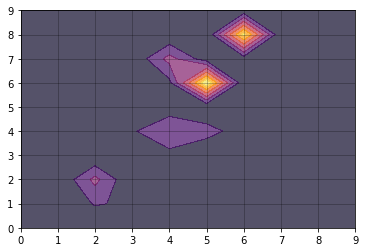

In [12]:
zs = np.zeros(xs.shape)
for i, row  in burned.iterrows():
    x, y = int(row['X']), int(row['Y'])
    #print (x,y)
    #if zs[x, y] > 0:
    #    print(x, y, ":duplicate entries!")
    zs[x, y] += row['area']
    
plt.contourf(xs, ys, zs, alpha=0.7, cmap=plt.cm.inferno)
plt.grid(c='k', ls='-', alpha=0.3)

#plt.show()

In [13]:
pd.DataFrame(zs)

0    1       2       3       4        5        6    7       8     9
0  0.0  0.0    0.00    0.00    0.00     0.00     0.00  0.0    0.00  0.00
1  0.0  0.0  219.94  157.14  150.28   115.47     0.00  0.0    0.00  0.00
2  0.0  0.0  462.65    0.00  143.37    92.63     0.00  0.0    0.00  0.00
3  0.0  0.0    0.00    6.58  126.35     2.18     0.00  0.0    0.00  0.00
4  0.0  0.0    0.00  172.88  397.43   287.01    87.73  0.0    0.00  0.00
5  0.0  0.0    0.00    0.00   73.75     0.00    17.62  0.0    0.00  0.00
6  0.0  0.0    0.00  192.78  144.47  1384.05     8.59  0.0    0.00  0.00
7  0.0  0.0    0.00   27.35  474.37    77.39    86.45  0.0    0.00  0.00
8  0.0  0.0    0.00   26.31   12.18     2.93  1265.30  0.0  185.76  0.00
9  0.0  0.0    0.00    0.00  185.61     8.16    42.87  0.0    0.00  4.47

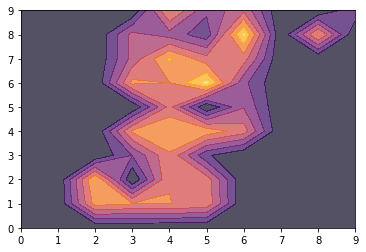

In [14]:
plt.contourf(xs, ys, np.log(zs + 1), alpha=0.7, cmap=plt.cm.inferno)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016FAC85BE10>,
      dtype=object)

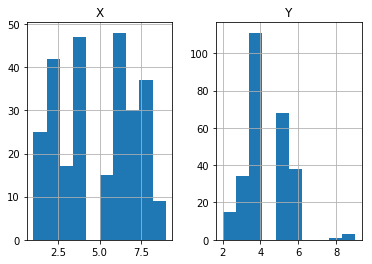

In [15]:
burned.loc[:, ['X', 'Y']].hist()

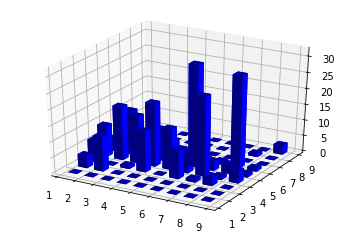

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(burned.loc[:, 'X'], burned.loc[:, 'Y'], bins=9, range=[[1, 9], [1, 9]])

# Construct arrays for the anchor positions of the 16 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

In [21]:
X = df.iloc[:, :-1]
#T = df.iloc[:, -1].as_matrix()
T = df.iloc[:, -1].values
N = df.shape[0]

# forgot conversion of string
monthdic = {'jan': 1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 
            'jul': 7, 'aug':8, 'sep':9, 'oct':10, 'nov': 11, 'dec': 12}
daydic = {'mon': 1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7 }

X['month'] = X['month'].apply(lambda x: monthdic[x])
X['day'] = X['day'].apply(lambda x: daydic[x])
#X = X.as_matrix()
X = X.values

Tlog = np.log(T + 1)

In [22]:
# adding basis
X1 = np.hstack((np.ones((N,1)), X))
X1

array([[ 1. ,  7. ,  5. , ..., 51. ,  6.7,  0. ],
       [ 1. ,  7. ,  4. , ..., 33. ,  0.9,  0. ],
       [ 1. ,  7. ,  4. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 1. ,  7. ,  4. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  1. ,  4. , ..., 42. ,  4. ,  0. ],
       [ 1. ,  6. ,  3. , ..., 31. ,  4.5,  0. ]])

In [23]:
w = np.linalg.lstsq(X1.T @ X1, X1.T @ Tlog)[0]

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [24]:
w

array([-0.30477203,  0.0425947 , -0.00129011,  0.1550639 ,  0.00862479,
        0.00502995,  0.00240059, -0.00119776, -0.02492829,  0.00730238,
       -0.00418998,  0.05759247,  0.08504343])

In [25]:
Y = X1 @ w

In [26]:
# RMSE 

E = Tlog-Y
E

array([-9.83710145e-01, -1.17337675e+00, -1.20468948e+00, -6.62126038e-01,
       -5.36517929e-01, -1.39881263e+00, -1.39095028e+00, -9.16238885e-01,
       -1.34829409e+00, -1.32630278e+00, -1.42799699e+00, -8.71468247e-01,
       -1.10886089e+00, -1.21894482e+00, -1.44973973e+00, -1.28358032e+00,
       -9.82795114e-01, -1.43146508e+00, -9.10328725e-01, -1.01678326e+00,
       -1.24452716e+00, -9.96311947e-01, -2.74615833e-01, -1.49844740e+00,
       -1.24070091e+00, -1.28475110e+00, -1.40081735e+00, -1.17198201e+00,
       -1.42257899e+00, -1.36739108e+00, -1.13092152e+00, -1.18254112e+00,
       -1.10650226e+00, -1.16398686e+00, -1.08067163e+00, -1.10831797e+00,
       -1.40413367e+00, -1.24196105e+00, -1.40998675e+00, -7.50319555e-01,
       -1.22554067e+00, -1.21377324e+00, -8.62136405e-01, -1.06805114e+00,
       -9.64698295e-01, -1.09389509e+00, -1.09017434e+00, -1.05145719e+00,
       -6.93732900e-01, -8.72851759e-01, -1.16677330e+00, -1.08359007e+00,
       -1.09074974e+00, -

In [27]:
(Tlog - Y)**2

array([9.67685650e-01, 1.37681301e+00, 1.45127674e+00, 4.38410891e-01,
       2.87851488e-01, 1.95667677e+00, 1.93474268e+00, 8.39493694e-01,
       1.81789696e+00, 1.75907907e+00, 2.03917541e+00, 7.59456906e-01,
       1.22957247e+00, 1.48582648e+00, 2.10174529e+00, 1.64757843e+00,
       9.65886237e-01, 2.04909227e+00, 8.28698388e-01, 1.03384819e+00,
       1.54884786e+00, 9.92637497e-01, 7.54138555e-02, 2.24534462e+00,
       1.53933874e+00, 1.65058538e+00, 1.96228925e+00, 1.37354184e+00,
       2.02373099e+00, 1.86975837e+00, 1.27898348e+00, 1.39840350e+00,
       1.22434724e+00, 1.35486542e+00, 1.16785118e+00, 1.22836872e+00,
       1.97159137e+00, 1.54246724e+00, 1.98806263e+00, 5.62979435e-01,
       1.50194994e+00, 1.47324548e+00, 7.43279181e-01, 1.14073325e+00,
       9.30642801e-01, 1.19660646e+00, 1.18848008e+00, 1.10556222e+00,
       4.81265336e-01, 7.61870194e-01, 1.36135994e+00, 1.17416745e+00,
       1.18973499e+00, 1.18973499e+00, 1.14609235e+00, 1.53996493e+00,
      

In [28]:
np.mean((Tlog - Y)**2)

1.8780043477613275

In [29]:
np.sqrt(np.mean((Tlog - Y)**2))

1.3704029873585826

In [30]:
pd.DataFrame(T).describe()

0
count   517.000000
mean     12.847292
std      63.655818
min       0.000000
25%       0.000000
50%       0.520000
75%       6.570000
max    1090.840000

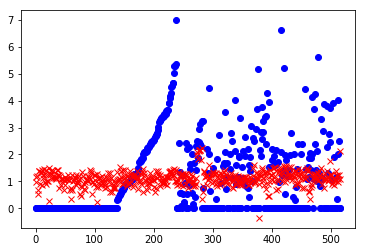

In [31]:
plt.plot(Tlog, 'ob')
plt.plot(Y, 'xr')

In [32]:
w

array([-0.30477203,  0.0425947 , -0.00129011,  0.1550639 ,  0.00862479,
        0.00502995,  0.00240059, -0.00119776, -0.02492829,  0.00730238,
       -0.00418998,  0.05759247,  0.08504343])

# How to Improve the Fit? 

- Normalizaiton (Standardization) 

In [33]:
pd.DataFrame(X).describe()

0           1           2           3           4           5   \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    7.475822    4.259188   90.644681  110.872340   
std      2.313778    1.229900    2.275990    2.072929    5.520111   64.046482   
min      1.000000    2.000000    1.000000    1.000000   18.700000    1.100000   
25%      3.000000    4.000000    7.000000    2.000000   90.200000   68.600000   
50%      4.000000    4.000000    8.000000    5.000000   91.600000  108.300000   
75%      7.000000    5.000000    9.000000    6.000000   92.900000  142.400000   
max      9.000000    9.000000   12.000000    7.000000   96.200000  291.300000   

               6           7           8           9           10          11  
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000  
mean   547.940039    9.021663   18.889168   44.288201    4.017602    0.021663  
std    248.066192    4.559477    5.806625   16.317469    1.791653    0.295959  
min      7.900000    0.000000    2.200000   15.000000    0.400000    0.000000  
25%    437.700000    6.500000   15.500000   33.000000    2.700000    0.000000  
50%    664.200000    8.400000   19.300000   42.000000    4.000000    0.000000  
75%    713.900000   10.800000   22.800000   53.000000    4.900000    0.000000  
max    860.600000   56.100000   33.300000  100.000000    9.400000    6.400000

In [34]:
mu = np.mean(X, axis=0)
std = np.std(X, axis=0)

In [35]:
normX = (X - mu) / std
pd.DataFrame(normX).describe()

0             1             2             3             4   \
count  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02   
mean   2.113074e-16  2.611279e-16 -1.030768e-16  8.589733e-17 -1.752306e-15   
std    1.000969e+00  1.000969e+00  1.000969e+00  1.000969e+00  1.000969e+00   
min   -1.587360e+00 -1.871724e+00 -2.848033e+00 -1.573785e+00 -1.304582e+01   
25%   -7.221360e-01 -2.440010e-01 -2.092640e-01 -1.090909e+00 -8.063453e-02   
50%   -2.895238e-01 -2.440010e-01  2.305307e-01  3.577209e-01  1.732292e-01   
75%    1.008313e+00  5.698604e-01  6.703255e-01  8.405974e-01  4.089598e-01   
max    1.873537e+00  3.825306e+00  1.989710e+00  1.323474e+00  1.007353e+00   

                 5             6             7             8             9   \
count  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02   
mean  -2.748715e-17  6.871787e-17  1.030768e-17  2.542561e-16  2.198972e-16   
std    1.000969e+00  1.000969e+00  1.000969e+00  1.000969e+00  1.000969e+00   
min   -1.715608e+00 -2.179108e+00 -1.980578e+00 -2.876943e+00 -1.796637e+00   
25%   -6.606652e-01 -4.448281e-01 -5.535954e-01 -5.842379e-01 -6.924563e-01   
50%   -4.020255e-02  4.691190e-01 -1.364774e-01  7.082076e-02 -1.403660e-01   
75%    4.927389e-01  6.696628e-01  3.904086e-01  6.741643e-01  5.344111e-01   
max    2.819865e+00  1.261610e+00  1.033538e+01  2.484195e+00  3.417549e+00   

                 10            11  
count  5.170000e+02  5.170000e+02  
mean  -4.191790e-16 -6.871787e-18  
std    1.000969e+00  1.000969e+00  
min   -2.021098e+00 -7.326831e-02  
25%   -7.361236e-01 -7.326831e-02  
50%   -9.833712e-03 -7.326831e-02  
75%    4.929823e-01 -7.326831e-02  
max    3.007063e+00  2.157228e+01

In [36]:
dfX = pd.DataFrame(X)
mu = dfX.mean() 
std = dfX.std()

In [37]:
ndfX = (dfX - mu) / std

In [38]:
ndfX

0         1         2         3         4         5         6   \
0    1.007337  0.569309 -1.966538  0.357375 -0.805180 -1.322045 -1.828706   
1    1.007337 -0.243765  1.109046 -1.089853 -0.008094 -1.178399  0.488418   
2    1.007337 -0.243765  1.109046  0.839784 -0.008094 -1.048806  0.560173   
3    1.439531  1.382383 -1.966538  0.357375  0.191177 -1.211188 -1.896429   
4    1.439531  1.382383 -1.966538  1.322193 -0.243597 -0.930142 -1.796859   
5    1.439531  1.382383  0.230308  1.322193  0.299871 -0.399278 -0.241629   
6    1.439531  1.382383  0.230308 -1.572262  0.299871 -0.343069 -0.210992   
7    1.439531  1.382383  0.230308 -1.572262  0.154946  0.539103  0.242919   
8    1.439531  1.382383  0.669677 -1.089853  0.064368  0.290846  0.583151   
9    1.007337  0.569309  0.669677  0.839784  0.336102 -0.357121  0.607338   
10   1.007337  0.569309  0.669677  0.839784  0.336102 -0.357121  0.607338   
11   1.007337  0.569309  0.669677  0.839784  0.390449 -0.588203  0.665387   
12   0.575144  0.569309  0.230308  0.357375 -4.917416 -0.625676  0.473099   
13   0.575144  0.569309  0.669677 -1.572262  0.046253  0.244005  0.558560   
14   0.575144  0.569309  0.669677 -0.607444  0.408564  0.350178  0.611369   
15   0.575144  0.569309  0.669677  0.357375  0.481026  0.473526  0.669015   
16   0.142950  0.569309 -1.966538  0.839784  0.191177 -1.172154 -1.883127   
17   1.439531  0.569309  1.109046 -1.572262 -1.040682 -1.218995  0.468665   
18   0.575144 -0.243765 -1.966538 -0.607444 -0.261712 -1.295502 -1.923438   
19   0.575144 -0.243765 -1.527169  0.839784 -0.787064 -1.303309 -1.817418   
20   0.575144 -0.243765  0.669677 -1.089853  0.064368  0.290846  0.583151   
21   0.142950 -0.243765  0.669677 -1.572262  0.209293 -0.505451  0.710939   
22   1.007337 -0.243765 -0.648431  1.322193  0.662182 -0.227528 -1.402610   
23   1.007337 -0.243765  0.230308  0.839784 -0.080557  0.000432 -0.042489   
24   1.007337 -0.243765  0.230308  0.839784  0.517258  0.445421  0.186482   
25   1.007337 -0.243765  0.230308  1.322193  0.136830  0.492262  0.215507   
26   1.007337 -0.243765  0.669677  0.357375  0.317986  0.109727  0.483984   
27   1.007337 -0.243765  0.669677 -1.572262  0.046253  0.244005  0.558560   
28   0.575144 -1.056839  0.669677  0.839784  0.499142  0.539103  0.699249   
29   0.575144 -1.056839  0.669677  1.322193  0.517258  0.599996  0.728273   
..        ...       ...       ...       ...       ...       ...       ...   
487  0.142950 -0.243765  0.230308 -1.089853  0.807107  0.475087  0.233244   
488 -0.289244 -0.243765  0.230308 -1.089853  0.807107  0.475087  0.233244   
489 -0.289244 -0.243765  0.230308 -0.607444  0.807107  0.475087  0.233244   
490 -0.289244 -0.243765  0.230308 -0.607444  0.807107  0.475087  0.233244   
491 -0.289244 -0.243765  0.230308 -0.125035  0.933916  0.642153  0.307015   
492 -1.585825 -1.056839  0.230308  0.357375  0.952031  0.735835  0.345311   
493 -1.585825 -1.056839  0.230308  0.357375  0.952031  0.735835  0.345311   
494  0.575144  1.382383  0.230308  0.839784  0.970147  0.829517  0.383204   
495  0.575144  1.382383  0.230308 -1.572262  1.006378  1.009074  0.458990   
496 -0.289244  0.569309  0.230308 -1.572262  1.006378  1.009074  0.458990   
497 -0.721437 -0.243765  0.230308 -1.089853  0.988263  1.096511  0.496883   
498  0.575144  0.569309  0.230308 -1.089853  0.988263  1.096511  0.496883   
499  1.007337  0.569309  0.230308 -1.089853  0.988263  1.096511  0.496883   
500  1.439531  1.382383  0.230308 -1.089853  0.988263  1.096511  0.496883   
501  1.007337  0.569309  0.230308 -1.089853  0.988263  1.096511  0.496883   
502 -0.289244 -0.243765  0.230308 -1.089853  0.988263  1.096511  0.496883   
503 -1.153631 -0.243765  0.230308 -0.607444  0.698413  0.445421  0.569042   
504 -0.289244 -1.056839  0.230308 -0.607444  0.698413  0.445421  0.569042   
505 -1.585825 -1.869913  0.230308 -0.125035  0.064368  0.817026  0.791966   
506 -1.585825 -1.869913  0.230308  0.357375  0.064368  0.874797  0.825022   
507 -1.

In [39]:
ndfX.describe()

0             1             2             3             4   \
count  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02   
mean   1.632049e-16  2.267690e-16 -5.497429e-17  1.683588e-16  4.202441e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.585825e+00 -1.869913e+00 -2.845277e+00 -1.572262e+00 -1.303319e+01   
25%   -7.214373e-01 -2.437649e-01 -2.090616e-01 -1.089853e+00 -8.055651e-02   
50%   -2.892437e-01 -2.437649e-01  2.303076e-01  3.573748e-01  1.730616e-01   
75%    1.007337e+00  5.693090e-01  6.696769e-01  8.397841e-01  4.085641e-01   
max    1.871724e+00  3.821605e+00  1.987784e+00  1.322193e+00  1.006378e+00   

                 5             6             7             8             9   \
count  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02   
mean  -4.672815e-16  1.882870e-15 -7.816657e-16  2.405125e-16  2.061536e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.713948e+00 -2.177000e+00 -1.978662e+00 -2.874160e+00 -1.794899e+00   
25%   -6.600260e-01 -4.443977e-01 -5.530598e-01 -5.836726e-01 -6.917863e-01   
50%   -4.016365e-02  4.686651e-01 -1.363453e-01  7.075224e-02 -1.402302e-01   
75%    4.922622e-01  6.690148e-01  3.900308e-01  6.735120e-01  5.338940e-01   
max    2.817136e+00  1.260389e+00  1.032538e+01  2.481791e+00  3.414243e+00   

                 10            11  
count  5.170000e+02  5.170000e+02  
mean  -4.191790e-16 -6.871787e-18  
std    1.000000e+00  1.000000e+00  
min   -2.019142e+00 -7.319742e-02  
25%   -7.354113e-01 -7.319742e-02  
50%   -9.824197e-03 -7.319742e-02  
75%    4.925053e-01 -7.319742e-02  
max    3.004153e+00  2.155141e+01

In [40]:
X1s = np.hstack((np.ones((N, 1)), ndfX.as_matrix())) 

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [41]:
w_s = np.linalg.lstsq(X1s.T @ X1s, X1s.T @ Tlog)[0]

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [42]:
Ys = X1s @ w_s

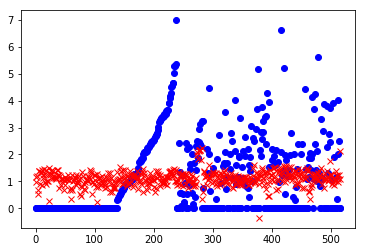

In [43]:
plt.plot(Tlog, 'ob')
plt.plot(Ys, 'xr')

In [44]:
w_s

array([ 1.11102577,  0.09855467, -0.00158671,  0.35292392,  0.01787856,
        0.02776591,  0.15374945, -0.2971249 , -0.11365999,  0.04240221,
       -0.06836984,  0.10318569,  0.02516938])

In [45]:
np.sqrt(np.sum((Tlog- Ys)**2))

31.159721561538486

# Does normalization help? 

- Normally
  - better results
  - more informative weights

- But, still the above results are poor! 
- what's next ?

In [46]:
df.loc[:,'month']

0      mar
1      oct
2      oct
3      mar
4      mar
5      aug
6      aug
7      aug
8      sep
9      sep
10     sep
11     sep
12     aug
13     sep
14     sep
15     sep
16     mar
17     oct
18     mar
19     apr
20     sep
21     sep
22     jun
23     aug
24     aug
25     aug
26     sep
27     sep
28     sep
29     sep
      ... 
487    aug
488    aug
489    aug
490    aug
491    aug
492    aug
493    aug
494    aug
495    aug
496    aug
497    aug
498    aug
499    aug
500    aug
501    aug
502    aug
503    aug
504    aug
505    aug
506    aug
507    aug
508    aug
509    aug
510    aug
511    aug
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [47]:
pd.get_dummies(df.loc[:, 'month'])

apr  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep
0      0    0    0    0    0    0    0    1    0    0    0    0
1      0    0    0    0    0    0    0    0    0    0    1    0
2      0    0    0    0    0    0    0    0    0    0    1    0
3      0    0    0    0    0    0    0    1    0    0    0    0
4      0    0    0    0    0    0    0    1    0    0    0    0
5      0    1    0    0    0    0    0    0    0    0    0    0
6      0    1    0    0    0    0    0    0    0    0    0    0
7      0    1    0    0    0    0    0    0    0    0    0    0
8      0    0    0    0    0    0    0    0    0    0    0    1
9      0    0    0    0    0    0    0    0    0    0    0    1
10     0    0    0    0    0    0    0    0    0    0    0    1
11     0    0    0    0    0    0    0    0    0    0    0    1
12     0    1    0    0    0    0    0    0    0    0    0    0
13     0    0    0    0    0    0    0    0    0    0    0    1
14     0    0    0    0    0    0    0    0    0    0    0    1
15     0    0    0    0    0    0    0    0    0    0    0    1
16     0    0    0    0    0    0    0    1    0    0    0    0
17     0    0    0    0    0    0    0    0    0    0    1    0
18     0    0    0    0    0    0    0    1    0    0    0    0
19     1    0    0    0    0    0    0    0    0    0    0    0
20     0    0    0    0    0    0    0    0    0    0    0    1
21     0    0    0    0    0    0    0    0    0    0    0    1
22     0    0    0    0    0    0    1    0    0    0    0    0
23     0    1    0    0    0    0    0    0    0    0    0    0
24     0    1    0    0    0    0    0    0    0    0    0    0
25     0    1    0    0    0    0    0    0    0    0    0    0
26     0    0    0    0    0    0    0    0    0    0    0    1
27     0    0    0    0    0    0    0    0    0    0    0    1
28     0    0    0    0    0    0    0    0    0    0    0    1
29     0    0    0    0    0    0    0    0    0    0    0    1
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
487    0    1    0    0    0    0    0    0    0    0    0    0
488    0    1    0    0    0    0    0    0    0    0    0    0
489    0    1    0    0    0    0    0    0    0    0    0    0
490    0    1    0    0    0    0    0    0    0    0    0    0
491    0    1    0    0    0    0    0    0    0    0    0    0
492    0    1    0    0    0    0    0    0    0    0    0    0
493    0    1    0    0    0    0    0    0    0    0    0    0
494    0    1    0    0    0    0    0    0    0    0    0    0
495    0    1    0    0    0    0    0    0    0    0    0    0
496    0    1    0    0    0    0    0    0    0    0    0    0
497    0    1    0    0    0    0    0    0    0    0    0    0
498    0    1    0    0    0    0    0    0    0    0    0    0
499    0    1    0    0    0    0    0    0    0    0    0    0
500    0    1    0    0    0    0    0    0    0    0    0    0
501    0    1    0    0    0    0    0    0    0    0    0    0
502    0    1    0    0    0    0    0    0    0    0    0    0
503    0    1    0    0    0    0    0    0    0    0    0    0
504    0    1    0    0    0    0    0    0    0    0    0    0
505    0    1    0    0    0    0    0    0    0    0    0    0
506    0    1    0    0    0    0    0    0    0    0    0    0
507    0    1    0    0    0    0    0    0    0    0    0    0
508    0    1    0    0    0    0    0    0    0    0    0    0
509    0    1    0    0    0    0    0    0    0    0    0    0
510    0    1    0    0    0    0    0    0    0    0    0    0
511    0    1    0    0    0    0    0    0    0    0    0    0
512    0    1    0    0    0    0    0    0    0    0    0    0
513    0    1    0    0    0    0    0    0    0    0    0    0
514    0    1    0    0    0    0    0    0    0    0    0    0
515    0    1    0    0    0    0    0    0    0    0    0    0
516    0    0    0    0    0    0    0    0    0    1    0    0

[517 rows x 12 columns]

In [48]:
pd.concat([pd.get_dummies(df.loc[:, 'month']), pd.get_dummies(df.loc[:, 'day'])], axis=1)

apr  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  fri  mon  \
0      0    0    0    0    0    0    0    1    0    0    0    0    1    0   
1      0    0    0    0    0    0    0    0    0    0    1    0    0    0   
2      0    0    0    0    0    0    0    0    0    0    1    0    0    0   
3      0    0    0    0    0    0    0    1    0    0    0    0    1    0   
4      0    0    0    0    0    0    0    1    0    0    0    0    0    0   
5      0    1    0    0    0    0    0    0    0    0    0    0    0    0   
6      0    1    0    0    0    0    0    0    0    0    0    0    0    1   
7      0    1    0    0    0    0    0    0    0    0    0    0    0    1   
8      0    0    0    0    0    0    0    0    0    0    0    1    0    0   
9      0    0    0    0    0    0    0    0    0    0    0    1    0    0   
10     0    0    0    0    0    0    0    0    0    0    0    1    0    0   
11     0    0    0    0    0    0    0    0    0    0    0    1    0    0   
12     0    1    0    0    0    0    0    0    0    0    0    0    1    0   
13     0    0    0    0    0    0    0    0    0    0    0    1    0    1   
14     0    0    0    0    0    0    0    0    0    0    0    1    0    0   
15     0    0    0    0    0    0    0    0    0    0    0    1    1    0   
16     0    0    0    0    0    0    0    1    0    0    0    0    0    0   
17     0    0    0    0    0    0    0    0    0    0    1    0    0    1   
18     0    0    0    0    0    0    0    1    0    0    0    0    0    0   
19     1    0    0    0    0    0    0    0    0    0    0    0    0    0   
20     0    0    0    0    0    0    0    0    0    0    0    1    0    0   
21     0    0    0    0    0    0    0    0    0    0    0    1    0    1   
22     0    0    0    0    0    0    1    0    0    0    0    0    0    0   
23     0    1    0    0    0    0    0    0    0    0    0    0    0    0   
24     0    1    0    0    0    0    0    0    0    0    0    0    0    0   
25     0    1    0    0    0    0    0    0    0    0    0    0    0    0   
26     0    0    0    0    0    0    0    0    0    0    0    1    1    0   
27     0    0    0    0    0    0    0    0    0    0    0    1    0    1   
28     0    0    0    0    0    0    0    0    0    0    0    1    0    0   
29     0    0    0    0    0    0    0    0    0    0    0    1    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
487    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
488    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
489    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
490    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
491    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
492    0    1    0    0    0    0    0    0    0    0    0    0    1    0   
493    0    1    0    0    0    0    0    0    0    0    0    0    1    0   
494    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
495    0    1    0    0    0    0    0    0    0    0    0    0    0    1   
496    0    1    0    0    0    0    0    0    0    0    0    0    0    1   
497    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
498    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
499    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
500    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
501    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
502    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
503    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
504    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
505    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
506    0    1    0    0    0    0    0    0    0    0    0    0    1    0   
5

In [49]:
df.columns.values

array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'], dtype=object)

In [50]:
X = pd.concat([
        df.iloc[:, :2], 
        pd.get_dummies(df.loc[:, 'month']), 
        pd.get_dummies(df.loc[:, 'day']),
        df.iloc[:, 4:-1]],
        axis=1)
X

X  Y  apr  aug  dec  feb  jan  jul  jun  mar  ...  tue  wed  FFMC    DMC  \
0    7  5    0    0    0    0    0    0    0    1  ...    0    0  86.2   26.2   
1    7  4    0    0    0    0    0    0    0    0  ...    1    0  90.6   35.4   
2    7  4    0    0    0    0    0    0    0    0  ...    0    0  90.6   43.7   
3    8  6    0    0    0    0    0    0    0    1  ...    0    0  91.7   33.3   
4    8  6    0    0    0    0    0    0    0    1  ...    0    0  89.3   51.3   
5    8  6    0    1    0    0    0    0    0    0  ...    0    0  92.3   85.3   
6    8  6    0    1    0    0    0    0    0    0  ...    0    0  92.3   88.9   
7    8  6    0    1    0    0    0    0    0    0  ...    0    0  91.5  145.4   
8    8  6    0    0    0    0    0    0    0    0  ...    1    0  91.0  129.5   
9    7  5    0    0    0    0    0    0    0    0  ...    0    0  92.5   88.0   
10   7  5    0    0    0    0    0    0    0    0  ...    0    0  92.5   88.0   
11   7  5    0    0    0    0    0    0    0    0  ...    0    0  92.8   73.2   
12   6  5    0    1    0    0    0    0    0    0  ...    0    0  63.5   70.8   
13   6  5    0    0    0    0    0    0    0    0  ...    0    0  90.9  126.5   
14   6  5    0    0    0    0    0    0    0    0  ...    0    1  92.9  133.3   
15   6  5    0    0    0    0    0    0    0    0  ...    0    0  93.3  141.2   
16   5  5    0    0    0    0    0    0    0    1  ...    0    0  91.7   35.8   
17   8  5    0    0    0    0    0    0    0    0  ...    0    0  84.9   32.8   
18   6  4    0    0    0    0    0    0    0    1  ...    0    1  89.2   27.9   
19   6  4    1    0    0    0    0    0    0    0  ...    0    0  86.3   27.4   
20   6  4    0    0    0    0    0    0    0    0  ...    1    0  91.0  129.5   
21   5  4    0    0    0    0    0    0    0    0  ...    0    0  91.8   78.5   
22   7  4    0    0    0    0    0    0    1    0  ...    0    0  94.3   96.3   
23   7  4    0    1    0    0    0    0    0    0  ...    0    0  90.2  110.9   
24   7  4    0    1    0    0    0    0    0    0  ...    0    0  93.5  139.4   
25   7  4    0    1    0    0    0    0    0    0  ...    0    0  91.4  142.4   
26   7  4    0    0    0    0    0    0    0    0  ...    0    0  92.4  117.9   
27   7  4    0    0    0    0    0    0    0    0  ...    0    0  90.9  126.5   
28   6  3    0    0    0    0    0    0    0    0  ...    0    0  93.4  145.4   
29   6  3    0    0    0    0    0    0    0    0  ...    0    0  93.5  149.3   
..  .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...    ...   
487  5  4    0    1    0    0    0    0    0    0  ...    1    0  95.1  141.3   
488  4  4    0    1    0    0    0    0    0    0  ...    1    0  95.1  141.3   
489  4  4    0    1    0    0    0    0    0    0  ...    0    1  95.1  141.3   
490  4  4    0    1    0    0    0    0    0    0  ...    0    1  95.1  141.3   
491  4  4    0    1    0    0    0    0    0    0  ...    0    0  95.8  152.0   
492  1  3    0    1    0    0    0    0    0    0  ...    0    0  95.9  158.0   
493  1  3    0    1    0    0    0    0    0    0  ...    0    0  95.9  158.0   
494  6  6    0    1    0    0    0    0    0    0  ...    0    0  96.0  164.0   
495  6  6    0    1    0    0    0    0    0    0  ...    0    0  96.2  175.5   
496  4  5    0    1    0    0    0    0    0    0  ...    0    0  96.2  175.5   
497  3  4    0    1    0    0    0    0    0    0  ...    1    0  96.1  181.1   
498  6  5    0    1    0    0    0    0    0    0  ...    1    0  96.1  181.1   
499  7  5    0    1    0    0    0    0    0    0  ...    1    0  96.1  181.1   
500  8  6    0    1    0    0    0    0    0    0  ...    1    0  96.1  181.1   
501  7  5    0    1    0    0    0    0    0    0  ...    1    0  96.1  181.1   
502  4  4    0    1    0    0    0    0    0    0  ...    1    0  96.1  181.1   
503  2  4    0    1    0    0    0    0    0    0  ...    0    1  94.5  139.4   
504  4  3    0    1    0    0    0  

In [51]:
def normalize(X):
    mu = X.mean() 
    std = X.std()
    return (X - mu) / std

In [52]:
nX = normalize(X)

In [53]:
nX.shape

(517, 29)

In [54]:
nX.describe()

X             Y           apr           aug           dec  \
count  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02   
mean   1.632049e-16  2.267690e-16 -1.717947e-17  1.099486e-16 -5.497429e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.585825e+00 -1.869913e+00 -1.329747e-01 -7.426195e-01 -1.329747e-01   
25%   -7.214373e-01 -2.437649e-01 -1.329747e-01 -7.426195e-01 -1.329747e-01   
50%   -2.892437e-01 -2.437649e-01 -1.329747e-01 -7.426195e-01 -1.329747e-01   
75%    1.007337e+00  5.693090e-01 -1.329747e-01  1.343980e+00 -1.329747e-01   
max    1.871724e+00  3.821605e+00  7.505682e+00  1.343980e+00  7.505682e+00   

              feb           jan           jul           jun           mar  \
count  517.000000  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02   
mean     0.000000  1.717947e-18 -6.871787e-17  2.748715e-17  1.099486e-16   
std      1.000000  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min     -0.200409 -6.225740e-02 -2.566160e-01 -1.842125e-01 -3.411819e-01   
25%     -0.200409 -6.225740e-02 -2.566160e-01 -1.842125e-01 -3.411819e-01   
50%     -0.200409 -6.225740e-02 -2.566160e-01 -1.842125e-01 -3.411819e-01   
75%     -0.200409 -6.225740e-02 -2.566160e-01 -1.842125e-01 -3.411819e-01   
max      4.980154  1.603128e+01  3.889336e+00  5.418014e+00  2.925319e+00   

       ...           tue           wed          FFMC           DMC  \
count  ...  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02   
mean   ...  1.889741e-17  8.417939e-17  4.202441e-14 -4.672815e-16   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -3.755091e-01 -3.411819e-01 -1.303319e+01 -1.713948e+00   
25%    ... -3.755091e-01 -3.411819e-01 -8.055651e-02 -6.600260e-01   
50%    ... -3.755091e-01 -3.411819e-01  1.730616e-01 -4.016365e-02   
75%    ... -3.755091e-01 -3.411819e-01  4.085641e-01  4.922622e-01   
max    ...  2.657900e+00  2.925319e+00  1.006378e+00  2.817136e+00   

                 DC           ISI          temp            RH          wind  \
count  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02   
mean   1.882870e-15 -7.816657e-16  2.405125e-16  2.061536e-16 -4.191790e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.177000e+00 -1.978662e+00 -2.874160e+00 -1.794899e+00 -2.019142e+00   
25%   -4.443977e-01 -5.530598e-01 -5.836726e-01 -6.917863e-01 -7.354113e-01   
50%    4.686651e-01 -1.363453e-01  7.075224e-02 -1.402302e-01 -9.824197e-03   
75%    6.690148e-01  3.900308e-01  6.735120e-01  5.338940e-01  4.925053e-01   
max    1.260389e+00  1.032538e+01  2.481791e+00  3.414243e+00  3.004153e+00   

               rain  
count  5.170000e+02  
mean  -6.871787e-18  
std    1.000000e+00  
min   -7.319742e-02  
25%   -7.319742e-02  
50%   -7.319742e-02  
75%   -7.319742e-02  
max    2.155141e+01  

[8 rows x 29 columns]

In [55]:
X1i = np.hstack((np.ones((N, 1)), nX.as_matrix()))

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [56]:
w_i = np.linalg.lstsq(X1i.T @ X1i, X1i.T @ Tlog)[0]

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [57]:
Yi = X1i @ w_i

In [58]:
np.sqrt(np.mean((Tlog- Yi)**2))

1.3442088524180986

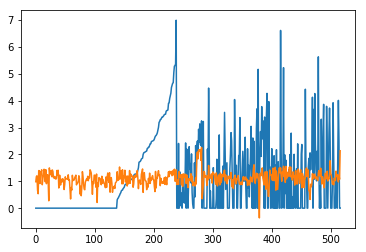

In [59]:
plt.plot(Tlog)
plt.plot(Y)

# Helpful? What is next? 

- more flexible or sophistigated model!
- will comeback later in this semester. 

# Least Mean Squares 

Let us switch the gear and practice LMS, the online learning algorithm. 

In [ ]:
import IPython.display as ipd  # for display and clear_output


# read one by one and update weights 
alpha = 0.001 

w_lms = np.random.rand(X1i.shape[1])

fig = plt.figure(figsize=(16,8))

errs = []
for i in range(N):
    w_lms -= alpha * (w_lms.T @ X1i[i] - Tlog[i]) * X1i[i]
    
    Y_lms = X1i @ w_lms
    errs.append( np.sqrt(np.mean(Tlog - Y_lms)**2) )
    
    plt.clf()
    plt.subplot(1,2, 1)
    plt.plot(errs)
    plt.ylabel("RMSE")
    
    plt.subplot(1,2, 2)
    plt.plot(Tlog[:i])
    plt.plot(Y_lms[:i])
    plt.ylabel("Current Estimation")
    
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)

In [ ]:
print("RMSE: {0}".format(errs[-1]))

# Partitioning Data 

- necessity to consider generalization of your model
- measure for the performance with unseen data


- training and testing partition

In [ ]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts



In [ ]:
Xlst, Tlst = partition(pd.DataFrame(X1i), pd.DataFrame(Tlog))

In [ ]:
Xlst[0].shape

In [ ]:
Xlst[1].shape

In [ ]:
Tlst[0].shape

In [ ]:
# read one by one and update weights 
alpha = 0.001 

Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ttrain, Ttest = [tt.as_matrix() for tt in Tlst]
 
w = np.random.rand(Xtrain.shape[1], Ttrain.shape[1])

fig = plt.figure(figsize=(16,8))

errs = []
for i in range(Xtrain.shape[0]):
    w -= alpha * ((w.T @ Xtrain[i] - Ttrain[i]) * Xtrain[i, None].T)
    
Yp = Xtest @ w
np.sqrt(np.mean((Yp -  Ttest)**2))

In [ ]:

plt.plot(Ttest)
plt.plot(Yp)

In [ ]:
# now with linear regression
w = np.linalg.lstsq(Xtrain.T @ Xtrain, Xtrain.T @ Ttrain)[0]

Yp2 = Xtest @ w
np.sqrt(np.mean((Yp2 -  Ttest)**2))

In [ ]:
plt.plot(Ttest)
plt.plot(Yp2)
